In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import pickle
import time

In [3]:
sns.set(style= 'white', context = 'notebook', rc = {'figure.figsize':(14,10)})

In [4]:
with open("RML2016.10a_dict.pkl",'rb') as f:
    Xd = pickle.load(f, encoding="latin1")
    
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])


In [5]:
snr = 18
X = []  
lbl = []
X_test = []
for mod in mods:
    X.append(Xd[(mod,snr)])
    for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))

In [6]:
Xsub = np.reshape(X,(11000,256),order = 'C')

In [7]:
Xsub

array([[ 0.00424138,  0.00294261,  0.00165142, ..., -0.00915179,
        -0.00889641, -0.0083046 ],
       [-0.00799273, -0.00761564, -0.00656336, ...,  0.0086769 ,
         0.00895824,  0.00891383],
       [-0.00139566, -0.00232965, -0.0031604 , ..., -0.00613821,
        -0.00662045, -0.00663787],
       ...,
       [ 0.00090855,  0.00091193,  0.00096988, ..., -0.00772037,
        -0.00776644, -0.00776909],
       [ 0.0009345 ,  0.00097915,  0.00097718, ..., -0.00780556,
        -0.00772785, -0.00776188],
       [ 0.00091991,  0.00093362,  0.00092781, ..., -0.00776374,
        -0.00768772, -0.00772689]], dtype=float32)

In [8]:
a = np.concatenate((lbl,Xsub),axis = 1)

In [9]:
a

array([['8PSK', '18', '0.004241383', ..., '-0.009151793', '-0.008896413',
        '-0.008304595'],
       ['8PSK', '18', '-0.007992728', ..., '0.008676899', '0.008958242',
        '0.008913834'],
       ['8PSK', '18', '-0.0013956649', ..., '-0.0061382107',
        '-0.0066204527', '-0.006637873'],
       ...,
       ['WBFM', '18', '0.0009085461', ..., '-0.0077203726',
        '-0.007766444', '-0.0077690906'],
       ['WBFM', '18', '0.0009345007', ..., '-0.0078055556',
        '-0.0077278484', '-0.0077618817'],
       ['WBFM', '18', '0.00091990683', ..., '-0.0077637355',
        '-0.0076877177', '-0.007726888']], dtype='<U32')

In [10]:
np.shape(a)

(11000, 258)

In [15]:
Ichan = ['I' + str(i) for i in range(1,129)]
Qchan = ['Q' + str(i) for i in range(1,129)]

MOD = 'MOD'
SNR = 'SNR'

number = list(range(11000))
# examples = ['eg' + str(i) for i in range(1,11001)]

data = pd.DataFrame(data = a, columns = [MOD,SNR, *Ichan, *Qchan], index = number)

In [12]:
data

,MOD,SNR,I1,I2,I3,I4,I5,I6,I7,I8,...,Q119,Q120,Q121,Q122,Q123,Q124,Q125,Q126,Q127,Q128
0,8PSK,18,0.004241383,0.0029426052,0.0016514166,0.0003302938,-0.0004847775,-0.0008517793,-0.00061959255,3.1596173e-05,...,-0.0058444827,-0.006397162,-0.007114555,-0.0076641683,-0.008349064,-0.0088250255,-0.009120277,-0.009151793,-0.008896413,-0.008304595
1,8PSK,18,-0.007992728,-0.007615638,-0.0065633645,-0.0052607763,-0.0033536023,-0.0015005346,0.0007524526,0.002472158,...,0.0018417808,0.002726085,0.0036280814,0.004656505,0.0057841046,0.0068661724,0.007892538,0.008676899,0.008958242,0.008913834
2,8PSK,18,-0.0013956649,-0.002329648,-0.0031603966,-0.004007704,-0.004674404,-0.005468821,-0.006283748,-0.007035836,...,0.007048996,0.005522431,0.0036099683,0.0015170495,-0.00095621846,-0.002984361,-0.0047581703,-0.0061382107,-0.0066204527,-0.006637873
3,8PSK,18,0.009135632,0.009599544,0.009690579,0.009290198,0.0085066585,0.0076215016,0.0061889333,0.004590335,...,-0.0008104656,8.872957e-05,0.0013522041,0.002775497,0.0039566904,0.005387038,0.0064586634,0.0073084817,0.00782593,0.008081968
4,8PSK,18,-0.010727788,-0.0101919,-0.009050099,-0.0076586786,-0.0057371706,-0.00393934,-0.0018167966,-3.281814e-05,...,-0.00530362,-0.003284833,-0.0011362035,0.00073499535,0.0025070463,0.004046212,0.004872509,0.0049249926,0.0041648424,0.0028583677
5,8PSK,18,-0.00058605,-0.0016988029,-0.003045691,-0.0043404307,-0.005756814,-0.006915635,-0.007759681,-0.008026719,...,0.004039545,0.0023428213,0.0002058136,-0.0023504535,-0.004907942,-0.0070352675,-0.008865647,-0.009793921,-0.010282852,-0.009914644
6,8PSK,18,0.0074573886,0.00648422,0.0046434645,0.002009245,-0.0010162623,-0.004020447,-0.0067368303,-0.008643708,...,0.00507344,0.003984458,0.002591039,0.0012285755,-0.00049815973,-0.0021979543,-0.004075311,-0.0055784103,-0.0070595792,-0.008054045
7,8PSK,18,-0.0067092106,-0.0066971155,-0.0065017305,-0.0060082655,-0.0051457076,-0.004006517,-0.0027328983,-0.0013919243,...,-0.0012598926,-0.0019582426,-0.0028103474,-0.0035691871,-0.0043291203,-0.005197588,-0.0060717864,-0.006596581,-0.0070301155,-0.0074872915
8,8PSK,18,-0.009926272,-0.009930421,-0.008626645,-0.0063747615,-0.003748766,-0.001013687,0.001256245,0.002746484,...,0.010207968,0.009432688,0.007904761,0.0058514546,0.0032596756,0.00051534816,-0.0022526442,-0.004669918,-0.0065615564,-0.0076630586
9,8PSK,18,-0.0022645511,-0.003169988,-0.0037102797,-0.0040882183,-0.0042009116,-0.004051032,-0.003337227,-0.002257655,...,0.0072975354,0.0077083507,0.007838392,0.007620179,0.006985046,0.006197434,0.005271989,0.0042975126,0.003454537,0.0027756712


In [16]:
data.head()

,MOD,SNR,I1,I2,I3,I4,I5,I6,I7,I8,...,Q119,Q120,Q121,Q122,Q123,Q124,Q125,Q126,Q127,Q128
0,8PSK,18,0.004241383,0.0029426052,0.0016514166,0.0003302938,-0.0004847775,-0.0008517793,-0.00061959255,3.1596173e-05,...,-0.0058444827,-0.006397162,-0.007114555,-0.0076641683,-0.008349064,-0.0088250255,-0.009120277,-0.009151793,-0.008896413,-0.008304595
1,8PSK,18,-0.007992728,-0.007615638,-0.0065633645,-0.0052607763,-0.0033536023,-0.0015005346,0.0007524526,0.002472158,...,0.0018417808,0.002726085,0.0036280814,0.004656505,0.0057841046,0.0068661724,0.007892538,0.008676899,0.008958242,0.008913834
2,8PSK,18,-0.0013956649,-0.002329648,-0.0031603966,-0.004007704,-0.004674404,-0.005468821,-0.006283748,-0.007035836,...,0.007048996,0.005522431,0.0036099683,0.0015170495,-0.00095621846,-0.002984361,-0.0047581703,-0.0061382107,-0.0066204527,-0.006637873
3,8PSK,18,0.009135632,0.009599544,0.009690579,0.009290198,0.0085066585,0.0076215016,0.0061889333,0.004590335,...,-0.0008104656,8.872957e-05,0.0013522041,0.002775497,0.0039566904,0.005387038,0.0064586634,0.0073084817,0.00782593,0.008081968
4,8PSK,18,-0.010727788,-0.0101919,-0.009050099,-0.0076586786,-0.0057371706,-0.00393934,-0.0018167966,-3.281814e-05,...,-0.00530362,-0.003284833,-0.0011362035,0.00073499535,0.0025070463,0.004046212,0.004872509,0.0049249926,0.0041648424,0.0028583677


In [17]:
data.MOD.value_counts()

AM-SSB    1000
GFSK      1000
8PSK      1000
CPFSK     1000
BPSK      1000
QPSK      1000
PAM4      1000
QAM16     1000
QAM64     1000
AM-DSB    1000
WBFM      1000
Name: MOD, dtype: int64

In [ ]:
# sns.pairplot(data, hue = 'MOD')

In [23]:
import umap
reducer = umap.UMAP()

mod_data = data[[*Ichan, *Qchan]].values

scaled_data = StandardScaler().fit_transform(mod_data)

embedding = reducer.fit_transform(scaled_data)
embedding.shape

(11000, 2)

In [21]:
np.shape(mod_data)

(11000, 256)

In [44]:
embedding

array([[ 9.695423  ,  2.0218139 ],
       [ 9.980165  ,  2.9938037 ],
       [10.406275  ,  1.4438338 ],
       ...,
       [ 0.19105607,  1.3580022 ],
       [ 0.04249132,  1.7520989 ],
       [ 0.02936782,  1.7006882 ]], dtype=float32)

Text(0.5, 1.0, 'UMAP projection for DSB,WBFM')

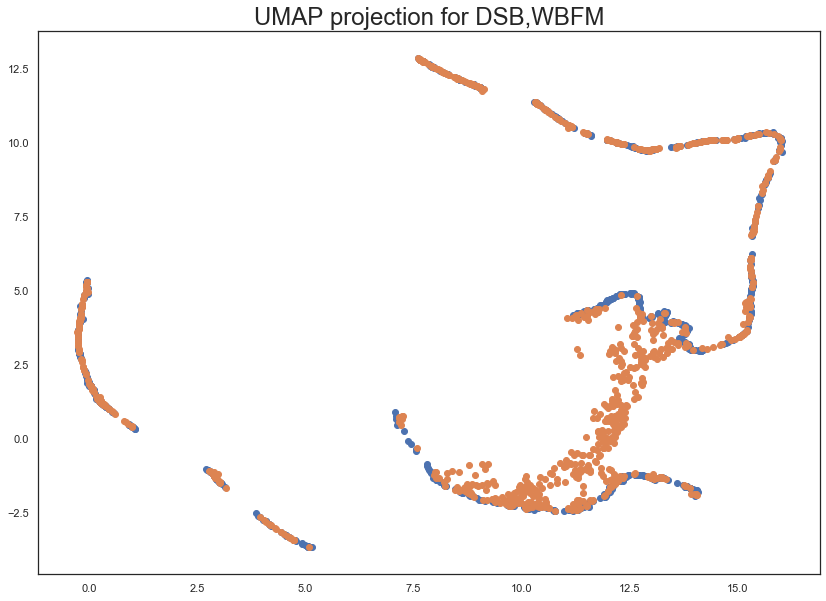

In [98]:
# x = 3
# #8PSK
# plt.scatter(
#     embedding[1000* 0 :1000 * (0+1)-1, 0],
#     embedding[1000* 0 :1000 * (0+1) -1, 1] )
# #BPSK
# plt.scatter(
#     embedding[1000* 3 :1000 * (3+1)-1, 0],
#     embedding[1000* 3 :1000 * (3+1) -1, 1] )
#AM-DSB
plt.scatter(
    embedding[1000* 1 :1000 * (1+1) -1, 0],
    embedding[1000* 1 :1000 * (1+1) -1, 1] )
# #AM-SSB
# plt.scatter(
#     embedding[1000* 2 :1000 * (2+1) -1, 0],
#     embedding[1000* 2 :1000 * (2+1) -1, 1] )
# #CPFSK
# plt.scatter(
#     embedding[1000* 4 :1000 * (4+1)-1, 0],
#     embedding[1000* 4 :1000 * (4+1)-1, 1] )
# #GFSK
# plt.scatter(
#     embedding[1000* 5 :1000 * (5+1)-1, 0],
#     embedding[1000* 5 :1000 * (5+1)-1, 1] )
# #PAM 4
# plt.scatter(
#     embedding[1000* 6 :1000 * (6+1)-1, 0],
#     embedding[1000* 6 :1000 * (6+1)-1, 1] )
# #QAM16
# plt.scatter(
#     embedding[1000* 7 :1000 * (7+1)-1, 0],
#     embedding[1000* 7 :1000 * (7+1)-1, 1] )
# #QAM64
# plt.scatter(
#     embedding[1000* 8 :1000 * (8+1)-1, 0],
#     embedding[1000* 8 :1000 * (8+1)-1, 1] )
# #QPSK
# plt.scatter(
#     embedding[1000* 9 :1000 * (9+1)-1, 0],
#     embedding[1000* 9 :1000 * (9+1)-1, 1] )
#WBFM
plt.scatter(
    embedding[1000* 10 :1000 * (10+1)-1, 0],
    embedding[1000* 10 :1000 * (10+1)-1, 1] )
#     c=[sns.color_palette()[x] for x in dat
#     c=[sns.color_palette()[x] for x in data.MOD.map({"AM-SSB":0,"GFSK":1,"8PSK":2,"CPFSK":3,"BPSK":4,"QPSK":5,"PAM4":6,
#                                                          "QAM16":5,"QAM64":4,"AM-DSB":3,"WBFM":2})])
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection for DSB,WBFM', fontsize=24)
